<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 150.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 147.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 131.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 134.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 127.2 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [5]:
## Write your code here
duplicates_count = df.duplicated().sum()
duplicates = df[df.duplicated()]

print(f"Nombre de lignes dupliquées : {duplicates_count}")
print("Premières lignes dupliquées :")
print(duplicates.head())

Nombre de lignes dupliquées : 20
Premières lignes dupliquées :
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [6]:
## Write your code here
subset_columns = ["MainBranch", "Employment", "RemoteWork"]
duplicates_subset = df[df.duplicated(subset=subset_columns, keep=False)]

duplicates_subset_count = duplicates_subset.shape[0]

print(f"Nombre de doublons basés sur {subset_columns}: {duplicates_subset_count}")
print("Premières lignes dupliquées basées sur les colonnes sélectionnées :")
print(duplicates_subset.head())

other_columns = [col for col in df.columns if col not in subset_columns]
for column in other_columns:
    print(f"\nFréquence des valeurs dans la colonne '{column}' pour les doublons :")
    print(duplicates_subset[column].value_counts())

Nombre de doublons basés sur ['MainBranch', 'Employment', 'RemoteWork']: 65290
Premières lignes dupliquées basées sur les colonnes sélectionnées :
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


/tmp/ipykernel_299/1952513375.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_duplicates.index, y=country_duplicates.values, palette='Blues_d')


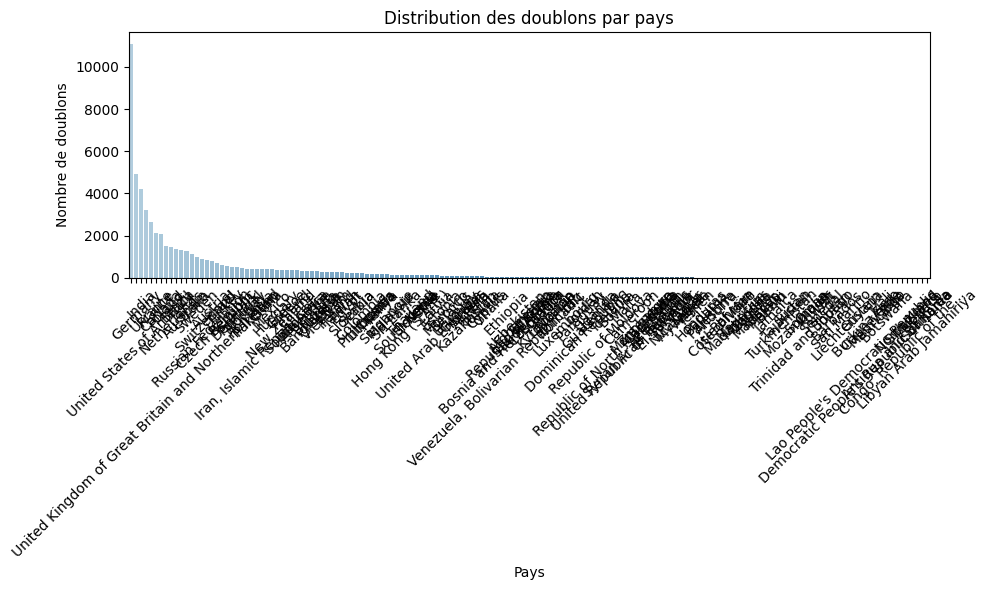

/tmp/ipykernel_299/1952513375.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_duplicates.index, y=employment_duplicates.values, palette='Greens_d')
/tmp/ipykernel_299/1952513375.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


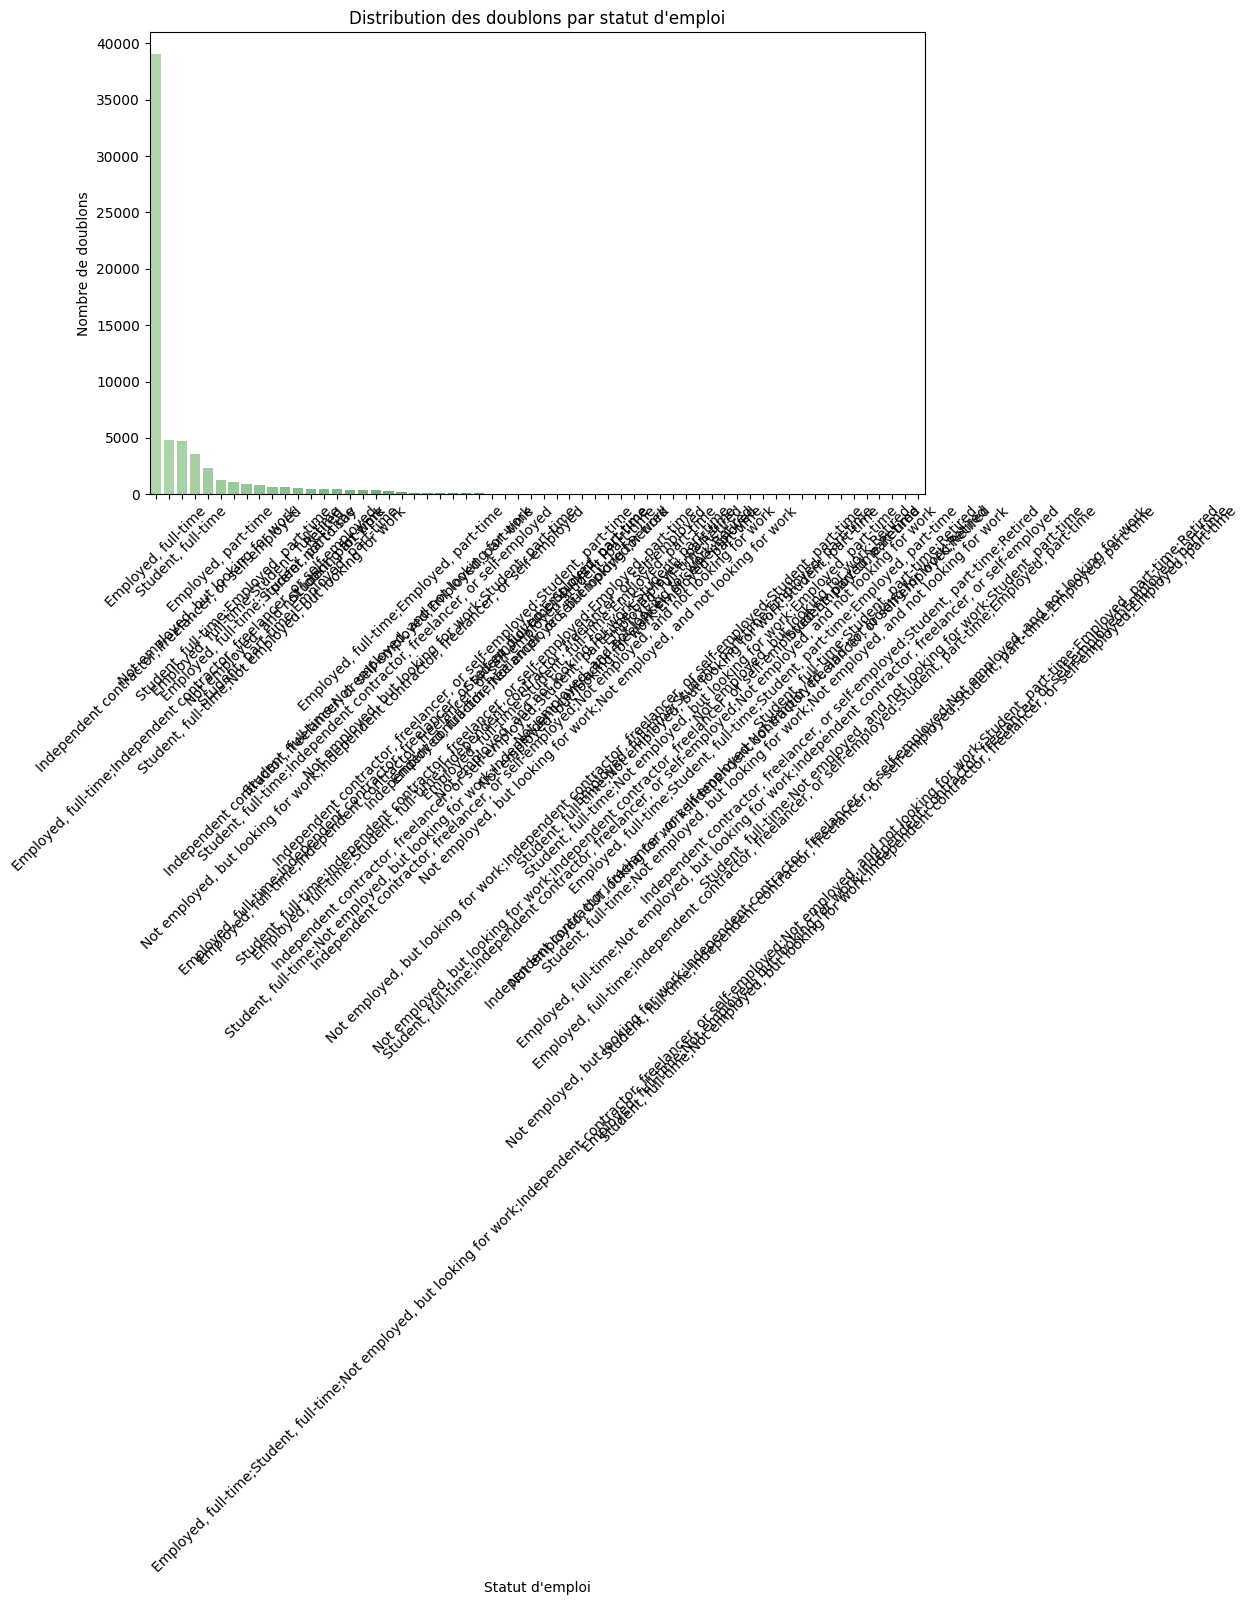

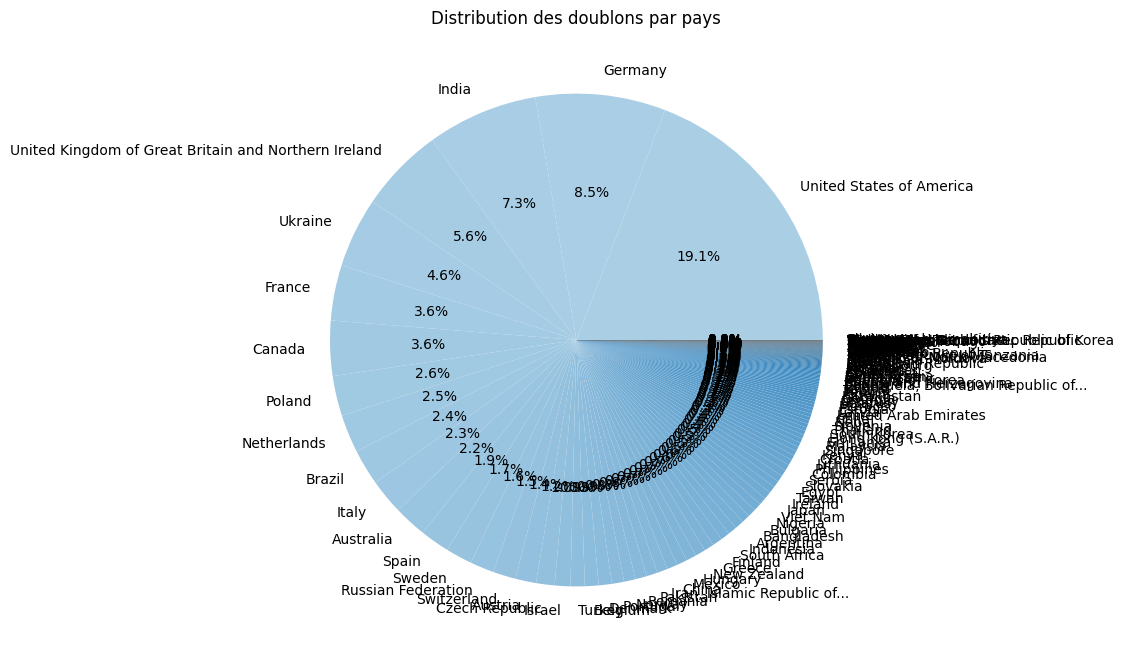

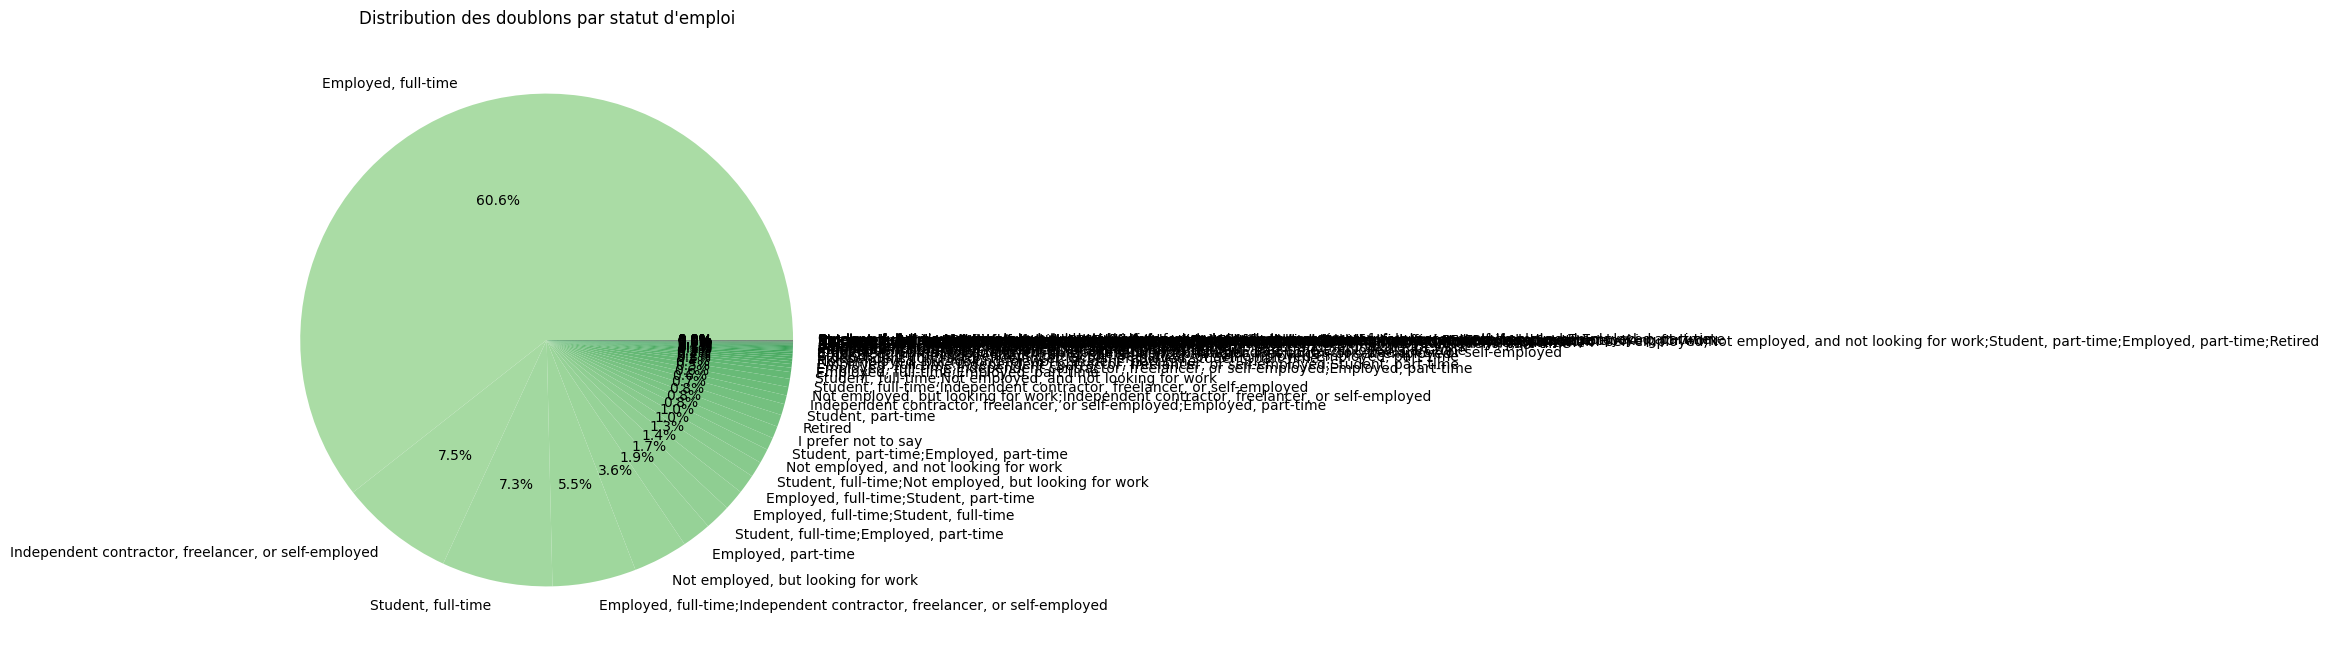

In [9]:
## Write your code here
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identifier les doublons dans les colonnes spécifiques
subset_columns = ["Country", "Employment"]
duplicates_subset = df[df.duplicated(subset=subset_columns, keep=False)]

# Analyser la distribution des doublons par 'Country'
country_duplicates = duplicates_subset['Country'].value_counts()

# Analyser la distribution des doublons par 'Employment'
employment_duplicates = duplicates_subset['Employment'].value_counts()

# Visualisation de la distribution des doublons par 'Country' - Graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=country_duplicates.index, y=country_duplicates.values, palette='Blues_d')
plt.title('Distribution des doublons par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de doublons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisation de la distribution des doublons par 'Employment' - Graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_duplicates.index, y=employment_duplicates.values, palette='Greens_d')
plt.title('Distribution des doublons par statut d\'emploi')
plt.xlabel('Statut d\'emploi')
plt.ylabel('Nombre de doublons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionnel : Visualiser les doublons sous forme de pie chart (camembert)

# Pie chart pour la distribution par pays
plt.figure(figsize=(8, 8))
country_duplicates.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Blues_d", len(country_duplicates)))
plt.title('Distribution des doublons par pays')
plt.ylabel('')
plt.show()

# Pie chart pour la distribution par statut d'emploi
plt.figure(figsize=(8, 8))
employment_duplicates.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Greens_d", len(employment_duplicates)))
plt.title('Distribution des doublons par statut d\'emploi')
plt.ylabel('')
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [10]:
## Write your code here
df_no_duplicates = df.drop_duplicates(subset=subset_columns, keep='first')

# Afficher les premières lignes du DataFrame après suppression des doublons
print(df_no_duplicates.head())

# Afficher le nombre de lignes après suppression des doublons
print(f"Nombre de lignes après suppression des doublons : {df_no_duplicates.shape[0]}")

# Optionnel : Vérifier que les doublons ont bien été supprimés
duplicates_check = df_no_duplicates[df_no_duplicates.duplicated(subset=subset_columns, keep=False)]
print(f"Nombre de doublons restants : {duplicates_check.shape[0]}")

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   
5           6     I code primarily as a hobby  Under 18 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   
5   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   
5                                 

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


Here's a concise documentation in English for **the process of identifying and removing duplicates**:

---

### Documentation: Identifying and Removing Duplicates

**Step 1: Identify Duplicate Rows**  
- We used `df.duplicated()` to detect fully duplicated rows.  
- `df.duplicated().sum()` gave us the total count of duplicates.  
- We previewed some duplicates using `df[df.duplicated()].head()`.

**Step 2: Analyze Duplicate Characteristics**  
- We analyzed duplicates based on key columns like `MainBranch`, `Employment`, and `RemoteWork` using:  
  ```python
  df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'])].head()
  ```  
- This helped us understand patterns and identify commonly repeated profiles.

**Step 3: Visualize Distribution**  
- We visualized duplicates by `Country` and `Employment` using bar charts to identify which categories had the most duplication.

**Step 4: Remove Duplicates**  
- Instead of removing fully identical rows, we removed duplicates based on selected columns with:  
  ```python
  df.drop_duplicates(subset=['MainBranch', 'Employment', 'RemoteWork'], inplace=True)
  ```  
- This retained more unique data while cleaning redundancy.

**Conclusion:**  
By carefully selecting relevant columns and visualizing duplicates, we effectively cleaned the dataset while preserving important and unique survey responses.

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


To clean the dataset without losing valuable data, we selected key columns that best represent the uniqueness of each survey respondent.

Country: Differentiates users geographically. Two users from different countries are unlikely to be the same.

Employment: Indicates job type (e.g., full-time, part-time), which can affect responses.

Age: Helps distinguish between respondents of different age groups.

These columns were chosen because they reflect essential aspects of a participant's identity. Removing duplicates based on all columns might delete valid entries. On the other hand, focusing on these meaningful columns helps eliminate only true duplicates, ensuring cleaner and more accurate data for analysis.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
